# Heart Attack Analysis, Prediction and Classification Algorithms.

### This notebook utilizes the "Heart Attack Analysis & Prediction" dataset for analysis. This dataset includes various attributes related to heart health, such as age, sex, cholesterol levels, and more. The goal is to explore the data and build predictive models to determine the likelihood of a heart attack based on these attributes.

# Import Necessary Libraries

In [340]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib
from flask import Flask, request, jsonify, render_template

# Load the Dataset

In [341]:
df = pd.read_csv('/content/heart.csv')

In [342]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Rename Columns for Clarity

In [343]:
df.rename(columns={
    'age': 'Age',
    'sex': 'Sex',
    'cp': 'ChestPainType',
    'trtbps': 'RestingBP',
    'chol': 'Cholesterol',
    'fbs': 'FastingBloodSugar',
    'restecg': 'RestECG',
    'thalachh': 'MaxHeartRate',
    'exng': 'ExerciseAngina',
    'oldpeak': 'ST_Depression',
    'slp': 'ST_Slope',
    'caa': 'NumMajorVessels',
    'thall': 'Thalassemia',
    'output': 'Target'
}, inplace=True)

print(df.columns)


Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol',
       'FastingBloodSugar', 'RestECG', 'MaxHeartRate', 'ExerciseAngina',
       'ST_Depression', 'ST_Slope', 'NumMajorVessels', 'Thalassemia',
       'Target'],
      dtype='object')


In [344]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                303 non-null    int64  
 1   Sex                303 non-null    int64  
 2   ChestPainType      303 non-null    int64  
 3   RestingBP          303 non-null    int64  
 4   Cholesterol        303 non-null    int64  
 5   FastingBloodSugar  303 non-null    int64  
 6   RestECG            303 non-null    int64  
 7   MaxHeartRate       303 non-null    int64  
 8   ExerciseAngina     303 non-null    int64  
 9   ST_Depression      303 non-null    float64
 10  ST_Slope           303 non-null    int64  
 11  NumMajorVessels    303 non-null    int64  
 12  Thalassemia        303 non-null    int64  
 13  Target             303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# Obtaining Statistical Information about the Dataset

In [345]:
df.describe()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBloodSugar,RestECG,MaxHeartRate,ExerciseAngina,ST_Depression,ST_Slope,NumMajorVessels,Thalassemia,Target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Check for Missing Values



In [346]:
null_counts = df.isnull().sum()
print(null_counts)

Age                  0
Sex                  0
ChestPainType        0
RestingBP            0
Cholesterol          0
FastingBloodSugar    0
RestECG              0
MaxHeartRate         0
ExerciseAngina       0
ST_Depression        0
ST_Slope             0
NumMajorVessels      0
Thalassemia          0
Target               0
dtype: int64


# Visualization and Analysis:

# Plot Distribution of Numerical Features

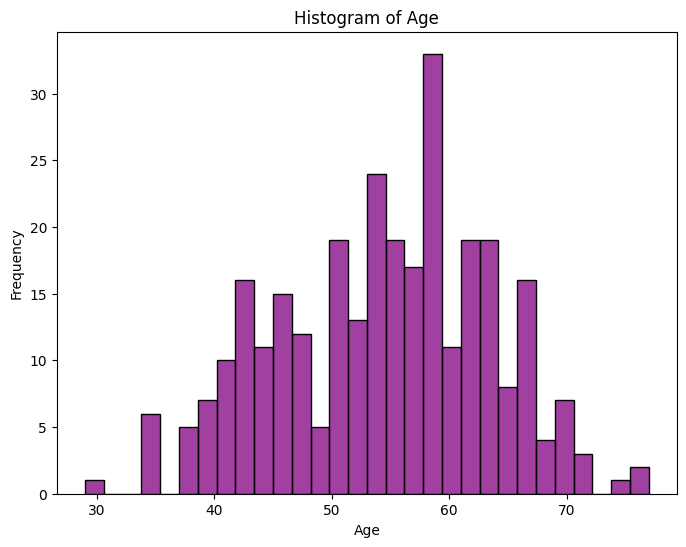

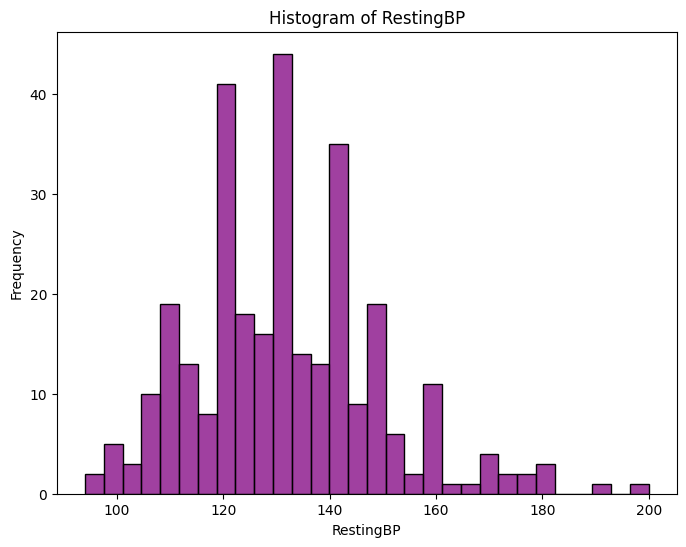

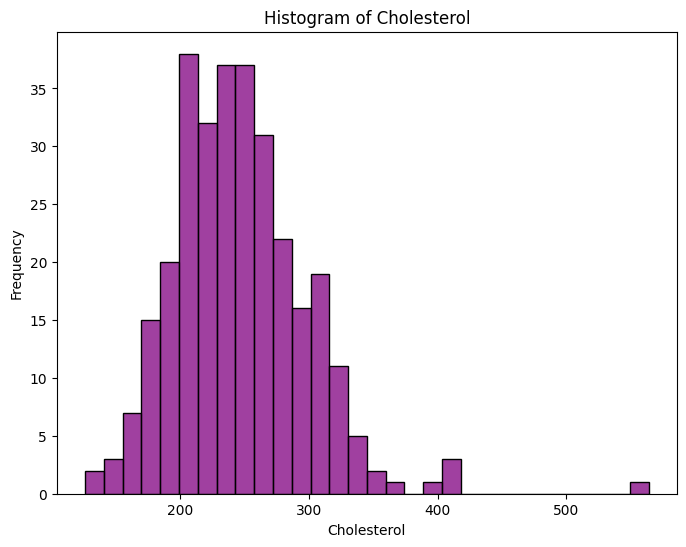

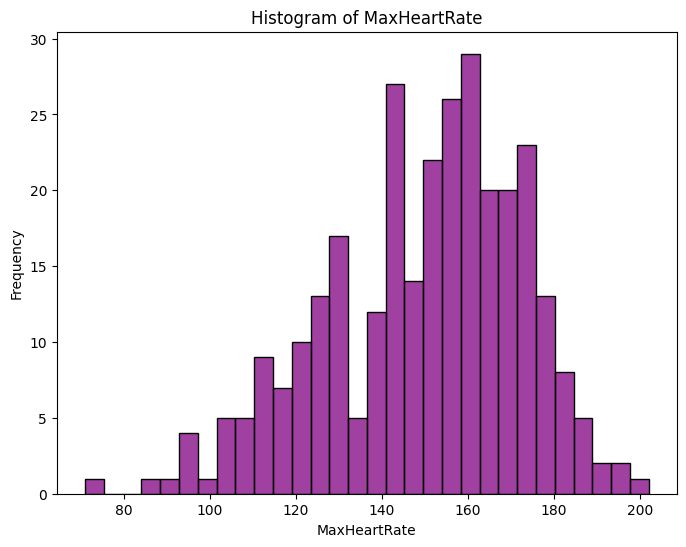

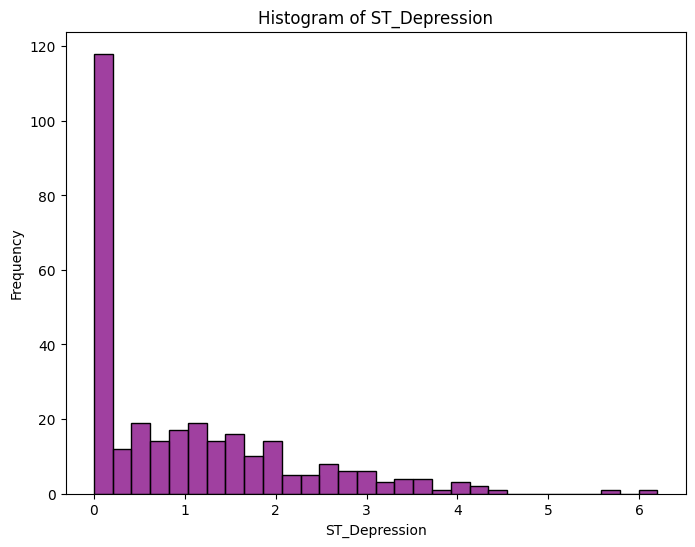

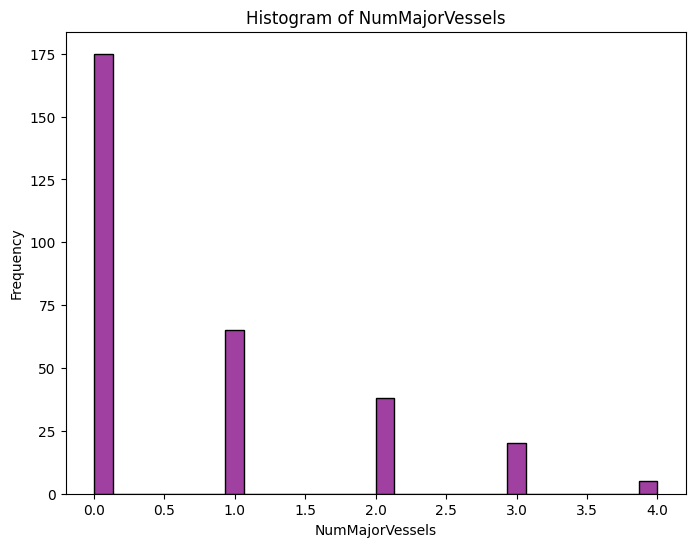

In [347]:
numeric_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHeartRate', 'ST_Depression', 'NumMajorVessels']
for col in numeric_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], bins=30,color='purple')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [365]:
categorical_features = ['Sex', 'ChestPainType', 'FastingBloodSugar', 'RestECG', 'ExerciseAngina', 'ST_Slope', 'NumMajorVessels', 'Thalassemia']

# Define categorical mappings for better visualization
ChestPainType_labels = {0: 'Typical Angina', 1: 'Atypical Angina', 2: 'Non-Anginal Pain', 3: 'Asymptomatic'}
RestECG_labels = {0: 'Normal', 1: 'ST-T Wave Abnormality', 2: 'Left Ventricular Hypertrophy'}
ExerciseAngina_labels = {0: 'No', 1: 'Yes'}
ST_Slope_labels = {0: 'Unsloping', 1: 'Flat', 2: 'Downsloping'}
Thalassemia_labels = {0: 'Null', 1: 'Fixed Defect', 2: 'Normal', 3: 'Reversible Defect'}
Target_labels = {0: 'Less Chance of Heart Disease', 1: 'More Chance of Heart Disease'}


# Plot each Categorical Column with Respect to the Target

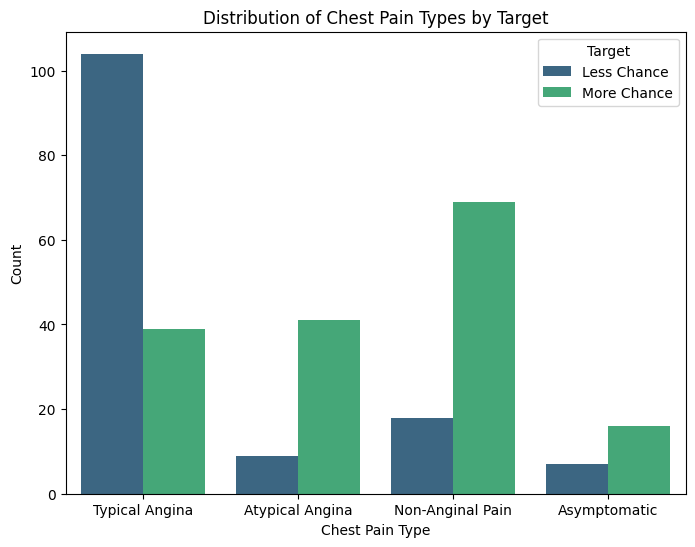

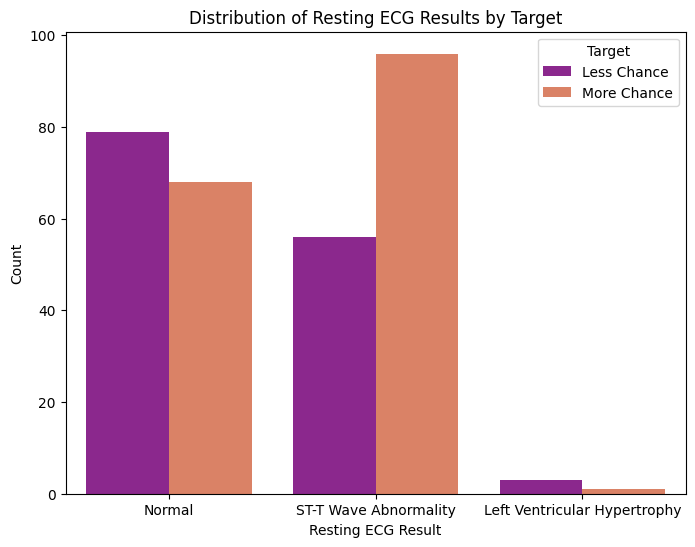

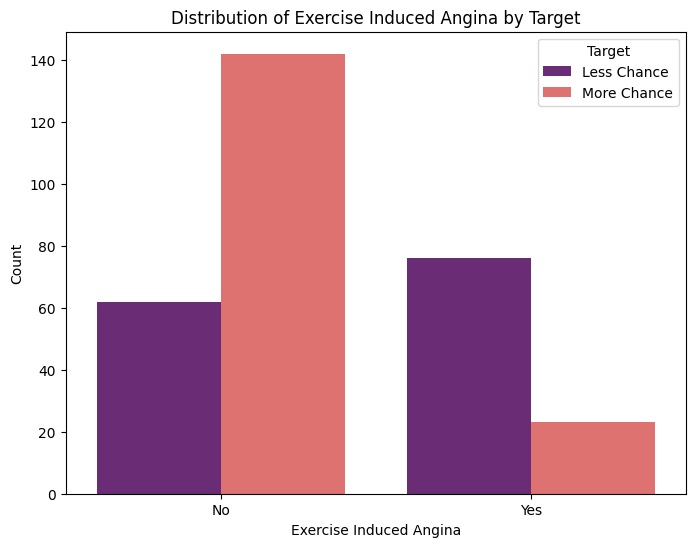

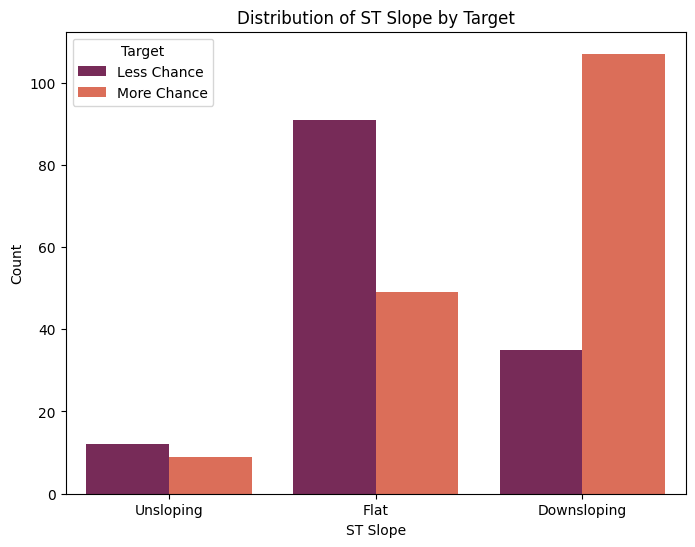

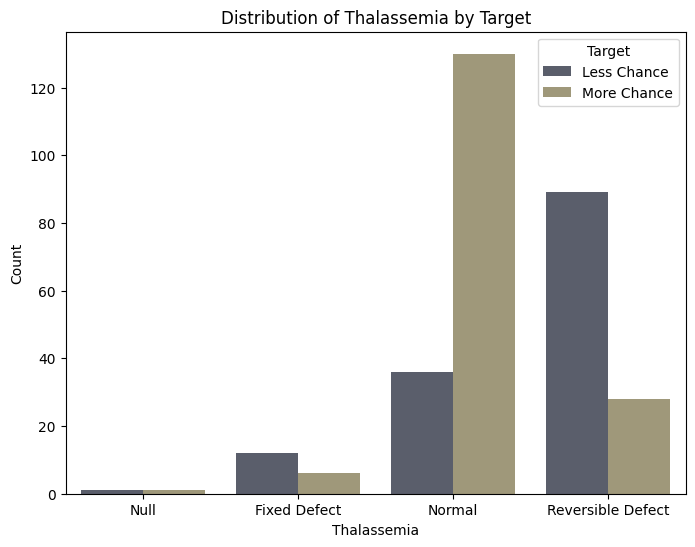

In [366]:
# Chest Pain Type
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='ChestPainType', hue='Target', palette='viridis')
plt.title('Distribution of Chest Pain Types by Target')
plt.xlabel('Chest Pain Type')
plt.xticks(ticks=[0, 1, 2, 3], labels=[ChestPainType_labels[i] for i in range(4)])
plt.ylabel('Count')
plt.legend(title='Target', labels=['Less Chance', 'More Chance'])
plt.show()

# Resting ECG
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='RestECG', hue='Target', palette='plasma')
plt.title('Distribution of Resting ECG Results by Target')
plt.xlabel('Resting ECG Result')
plt.xticks(ticks=[0, 1, 2], labels=[RestECG_labels[i] for i in range(3)])
plt.ylabel('Count')
plt.legend(title='Target', labels=['Less Chance', 'More Chance'])
plt.show()

# Exercise Induced Angina
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='ExerciseAngina', hue='Target', palette='magma')
plt.title('Distribution of Exercise Induced Angina by Target')
plt.xlabel('Exercise Induced Angina')
plt.xticks(ticks=[0, 1], labels=[ExerciseAngina_labels[i] for i in range(2)])
plt.ylabel('Count')
plt.legend(title='Target', labels=['Less Chance', 'More Chance'])
plt.show()

# ST Slope
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='ST_Slope', hue='Target', palette='rocket')
plt.title('Distribution of ST Slope by Target')
plt.xlabel('ST Slope')
plt.xticks(ticks=[0, 1, 2], labels=[ST_Slope_labels[i] for i in range(3)])
plt.ylabel('Count')
plt.legend(title='Target', labels=['Less Chance', 'More Chance'])
plt.show()

# Thalassemia
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Thalassemia', hue='Target', palette='cividis')
plt.title('Distribution of Thalassemia by Target')
plt.xlabel('Thalassemia')
plt.xticks(ticks=[0, 1, 2, 3], labels=[Thalassemia_labels[i] for i in range(4)])
plt.ylabel('Count')
plt.legend(title='Target', labels=['Less Chance', 'More Chance'])
plt.show()


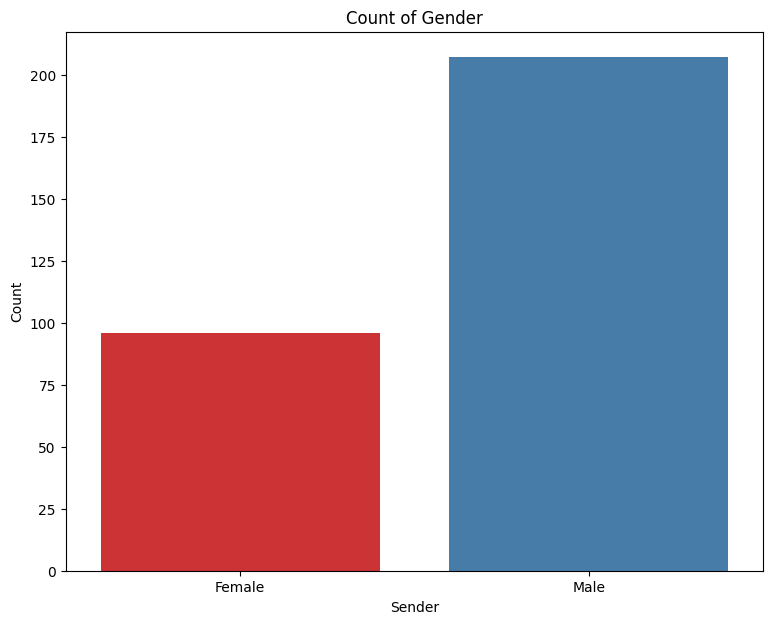

In [348]:
f, ax = plt.subplots(figsize=(9, 7))
sns.countplot(data=df, x="Sex", hue="Sex", palette="Set1", ax=ax, legend=False)

ax.set_xlabel('Sender')
ax.set_ylabel('Count')
ax.set_title('Count of Gender')
ax.set_xticks([0, 1])
ax.set_xticklabels(['Female', 'Male'])

plt.show()

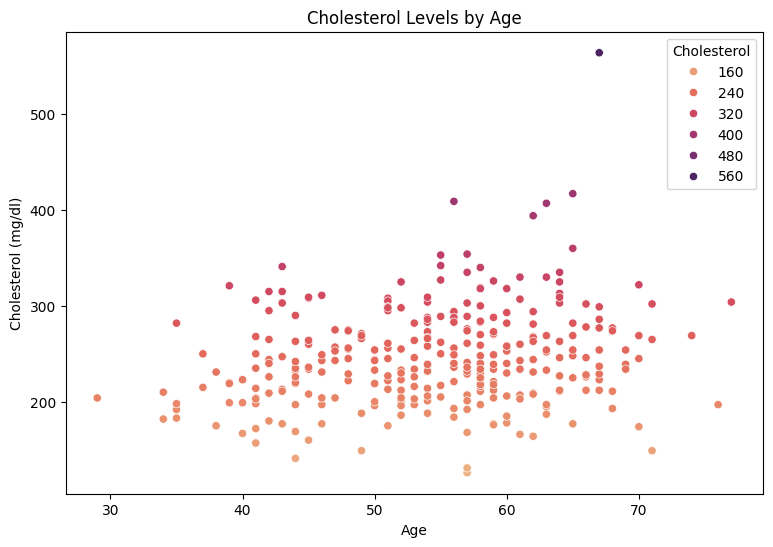

In [349]:
plt.figure(figsize=(9, 6))
sns.scatterplot(data=df, x='Age', y='Cholesterol', hue='Cholesterol', palette='flare')
plt.title('Cholesterol Levels by Age')
plt.xlabel('Age')
plt.ylabel('Cholesterol (mg/dl)')
plt.legend(title='Cholesterol')
plt.show()

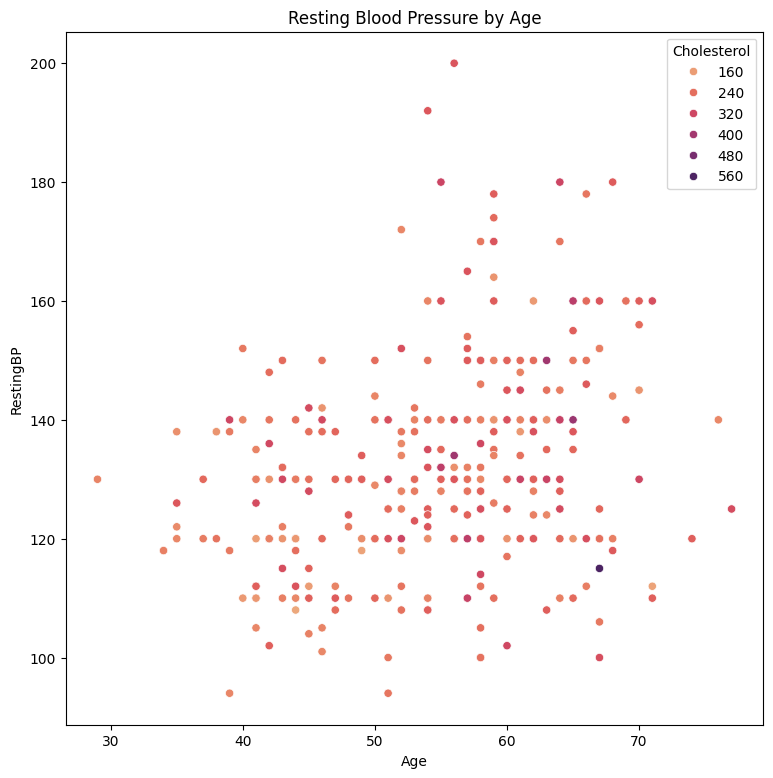

In [350]:
plt.figure(figsize=(9, 9))
f = sns.scatterplot(data=df, x='Age', y='RestingBP', hue='Cholesterol', palette="flare")
plt.title("Resting Blood Pressure by Age")
plt.show()

# Plot Correlation between numerical features Using Heatmap


<Axes: >

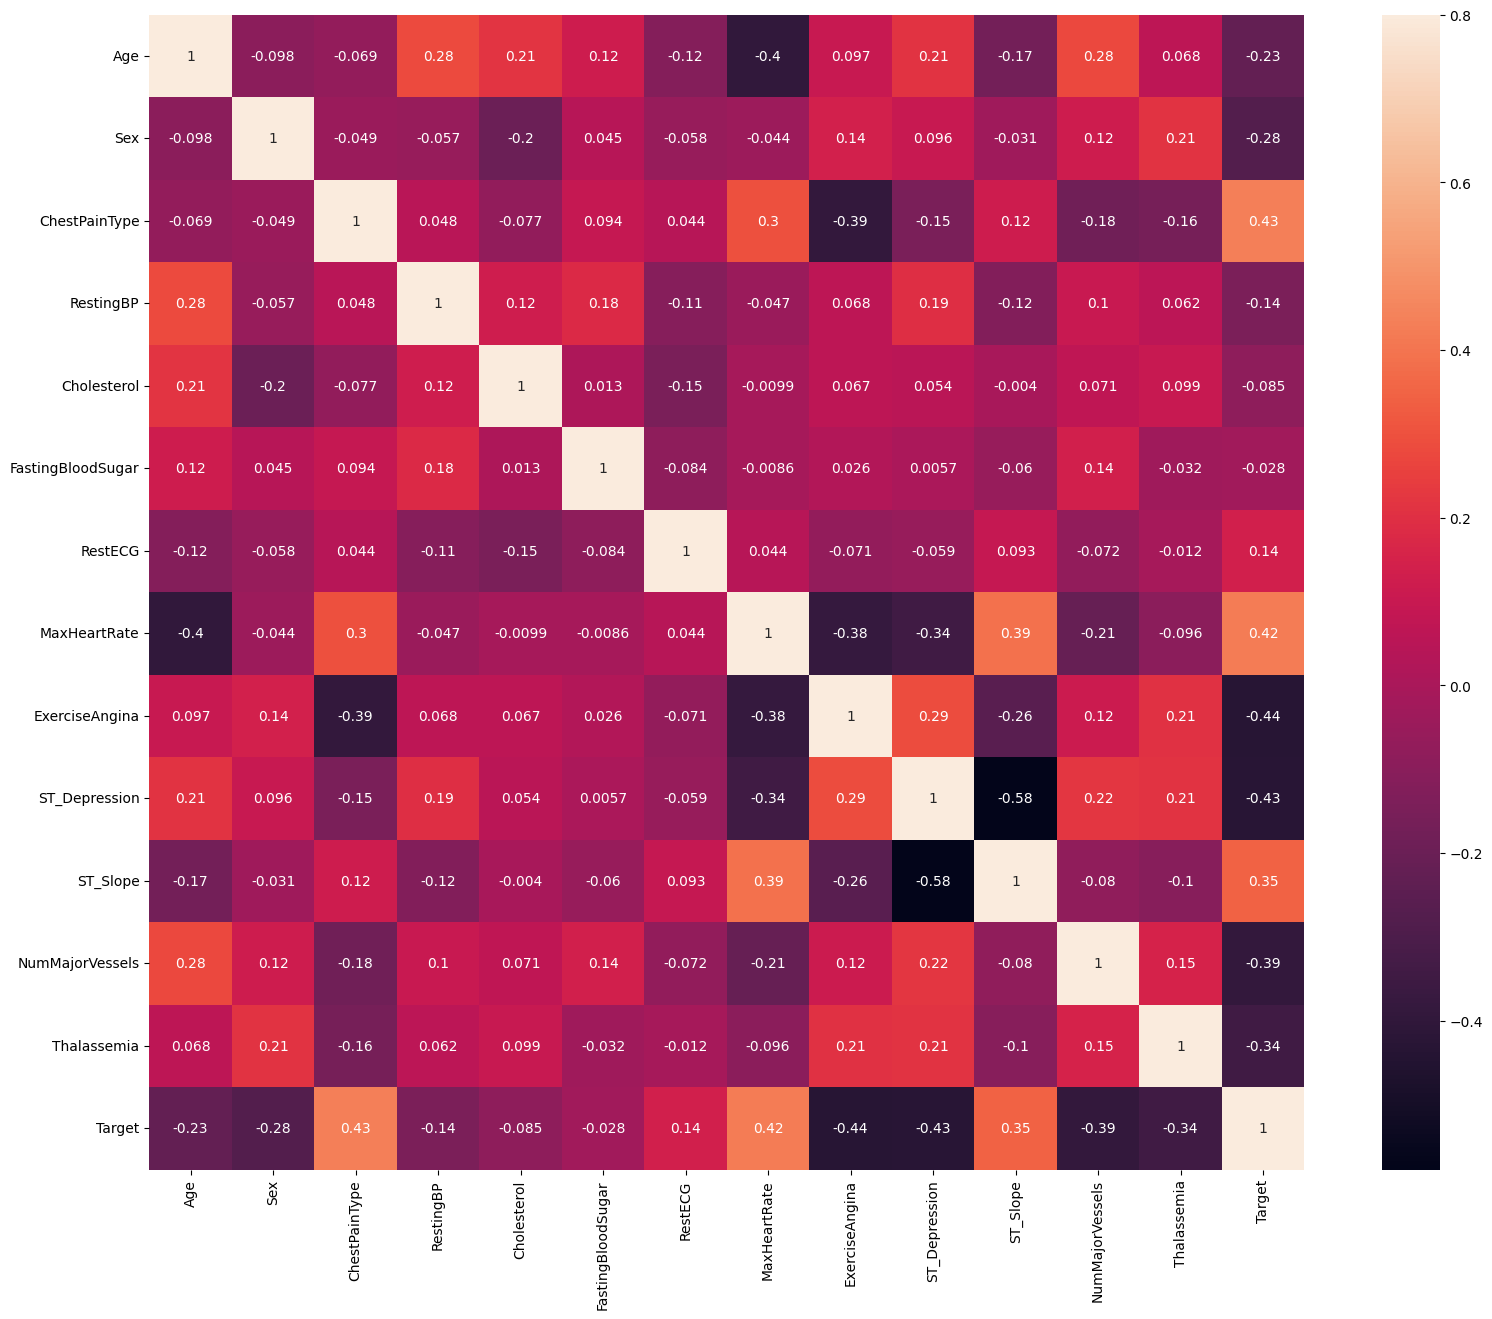

In [351]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(corrmat, vmax=.8, square=True, annot=True)

# Define Preprocessing and Model Pipeline

In [352]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [353]:
categorical_features = ['Sex', 'ChestPainType', 'FastingBloodSugar', 'RestECG', 'ExerciseAngina', 'ST_Slope', 'NumMajorVessels', 'Thalassemia']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define the complete pipeline with a classifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

# Split the Data into Training, Validation, and Test Sets

In [354]:
X = df.drop('Target', axis=1)
y = df['Target']

X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.2, random_state=42)

# Define a Function to Evaluate the Models

In [355]:
def evaluate_model(model, X_train, y_train, X_val, y_val):
    model.fit(X_train, y_train)
    y_val_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_val_pred)
    conf_matrix = confusion_matrix(y_val, y_val_pred)
    class_report = classification_report(y_val, y_val_pred)

    print(f'Accuracy: {accuracy}')
    print('Confusion Matrix:')
    print(conf_matrix)
    print('Classification Report:')
    print(class_report)


# Train and Evaluate Logistic Regression

In [356]:
print("Logistic Regression:")
pipeline.set_params(classifier=LogisticRegression())
evaluate_model(pipeline, X_train, y_train, X_val, y_val)

Logistic Regression:
Accuracy: 0.8571428571428571
Confusion Matrix:
[[22  3]
 [ 4 20]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.88      0.86        25
           1       0.87      0.83      0.85        24

    accuracy                           0.86        49
   macro avg       0.86      0.86      0.86        49
weighted avg       0.86      0.86      0.86        49



# Train and Evaluate SVM with Linear Kernel

In [357]:
print("\nSVM with Linear Kernel:")
pipeline.set_params(classifier=SVC(kernel='linear'))
evaluate_model(pipeline, X_train, y_train, X_val, y_val)


SVM with Linear Kernel:
Accuracy: 0.7959183673469388
Confusion Matrix:
[[19  6]
 [ 4 20]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.76      0.79        25
           1       0.77      0.83      0.80        24

    accuracy                           0.80        49
   macro avg       0.80      0.80      0.80        49
weighted avg       0.80      0.80      0.80        49



# Train and Evaluate SVM with Polynomial Kernel

In [358]:
print("\nSVM with Polynomial Kernel:")
pipeline.set_params(classifier=SVC(kernel='poly', degree=3))
evaluate_model(pipeline, X_train, y_train, X_val, y_val)


SVM with Polynomial Kernel:
Accuracy: 0.7755102040816326
Confusion Matrix:
[[18  7]
 [ 4 20]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.72      0.77        25
           1       0.74      0.83      0.78        24

    accuracy                           0.78        49
   macro avg       0.78      0.78      0.78        49
weighted avg       0.78      0.78      0.77        49



# Train and Evaluate Decision Tree

In [359]:
print("\nDecision Tree:")
pipeline.set_params(classifier=DecisionTreeClassifier())
evaluate_model(pipeline, X_train, y_train, X_val, y_val)


Decision Tree:
Accuracy: 0.6326530612244898
Confusion Matrix:
[[15 10]
 [ 8 16]]
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.60      0.63        25
           1       0.62      0.67      0.64        24

    accuracy                           0.63        49
   macro avg       0.63      0.63      0.63        49
weighted avg       0.63      0.63      0.63        49



# Train and Evaluate KNN with Different Distance Metrics

In [360]:
knn_euclidean = KNeighborsClassifier(metric='euclidean')
knn_manhattan = KNeighborsClassifier(metric='manhattan')

print("KNN with Euclidean distance:")
evaluate_model(knn_euclidean, X_train, y_train, X_val, y_val)

print("\nKNN with Manhattan distance:")
evaluate_model(knn_manhattan, X_train, y_train, X_val, y_val)

# After evaluation, test the models on the test set
print("\nTesting models on the test set:")
y_pred_euclidean = knn_euclidean.predict(X_test)
y_pred_manhattan = knn_manhattan.predict(X_test)

accuracy_euclidean = accuracy_score(y_test, y_pred_euclidean)
accuracy_manhattan = accuracy_score(y_test, y_pred_manhattan)

print("Accuracy (Euclidean) on test set:", accuracy_euclidean)
print("Accuracy (Manhattan) on test set:", accuracy_manhattan)

KNN with Euclidean distance:
Accuracy: 0.6326530612244898
Confusion Matrix:
[[11 14]
 [ 4 20]]
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.44      0.55        25
           1       0.59      0.83      0.69        24

    accuracy                           0.63        49
   macro avg       0.66      0.64      0.62        49
weighted avg       0.66      0.63      0.62        49


KNN with Manhattan distance:
Accuracy: 0.6326530612244898
Confusion Matrix:
[[11 14]
 [ 4 20]]
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.44      0.55        25
           1       0.59      0.83      0.69        24

    accuracy                           0.63        49
   macro avg       0.66      0.64      0.62        49
weighted avg       0.66      0.63      0.62        49


Testing models on the test set:
Accuracy (Euclidean) on test set: 0.6557377049180327
Accuracy (Manhattan) on

# Save the Model with the Best Performance

In [361]:
best_model = pipeline.set_params(classifier=LogisticRegression())
best_model.fit(X_temp, y_temp)
joblib.dump(best_model, 'best_model.pkl')

['best_model.pkl']